In [216]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols, glm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [217]:
#import the merged data set
HumanA= pd.read_csv('/Users/tracysanchezpacheco/Documents/Resources/humanA_Behavioural.csv')
HumanA.dropna(axis=0, inplace=True)
HumanAf = HumanA[HumanA['ID'] != 4623]

In [218]:
# Define probability distribution for the response variable for the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

## Order effects

Text(0.5, 0, 'Residuals')

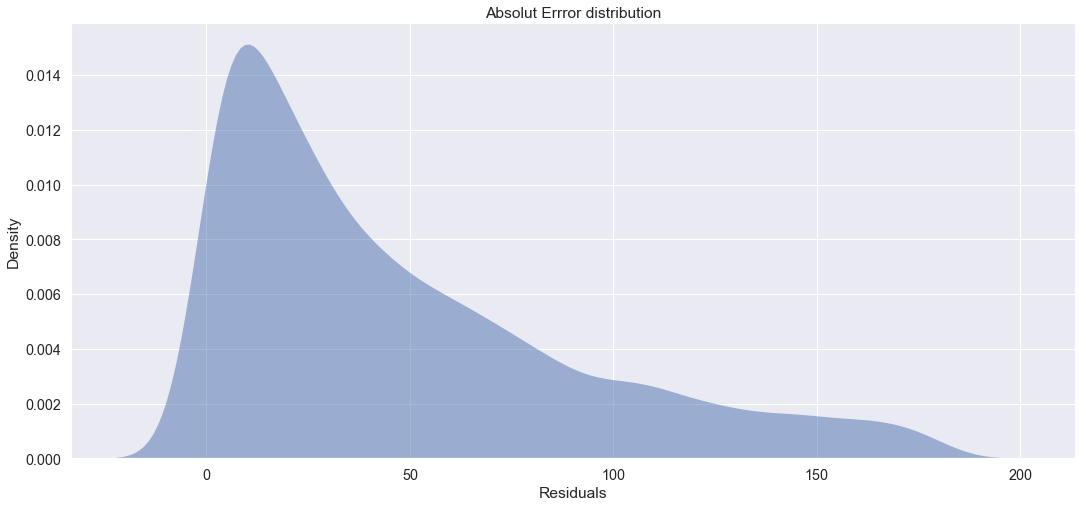

In [219]:
#Plotting KDE for first independent variable
ax = sns.kdeplot(x='AbsolutError', data= HumanAf, shade='fill', palette='Crest', alpha=.5, linewidth=0,)
ax.set_title("Absolut Errror distribution")
ax.set_xlabel("Residuals")

Text(0.5, 0, 'Residuals')

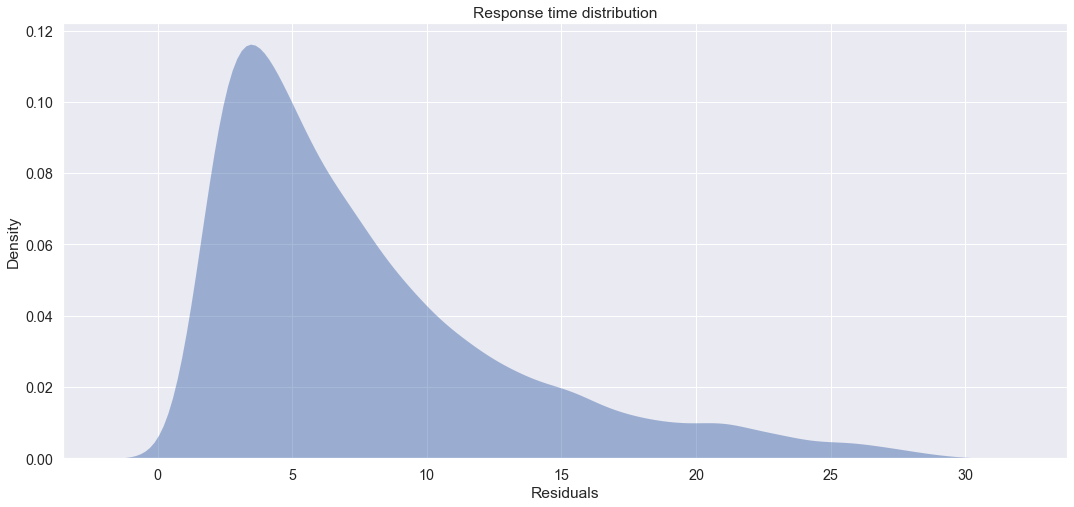

In [220]:
#Plotting KDE for second independent variable
ax = sns.kdeplot(x='RT', data= HumanAf, shade='fill', palette='Crest', alpha=.5, linewidth=0,)
ax.set_title("Response time distribution")
ax.set_xlabel("Residuals")

In [221]:
# Response time predicted by trial order in each starting location
formula = 'np.log(RT) ~ C(ID_for_StartingPosition, Treatment(reference=12))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


                                Mixed Linear Model Regression Results
Model:                           MixedLM                Dependent Variable:                np.log(RT)
No. Observations:                7708                   Method:                            REML      
No. Groups:                      23                     Scale:                             0.3352    
Min. group size:                 329                    Log-Likelihood:                    -6802.4575
Max. group size:                 336                    Converged:                         No        
Mean group size:                 335.1                                                               
-----------------------------------------------------------------------------------------------------
                                                            Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------------------
Intercept   

/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 6.623656
  warnings.warn(msg, ConvergenceWarning)


Text(0.5, 21.200000000000003, 'Residuals')

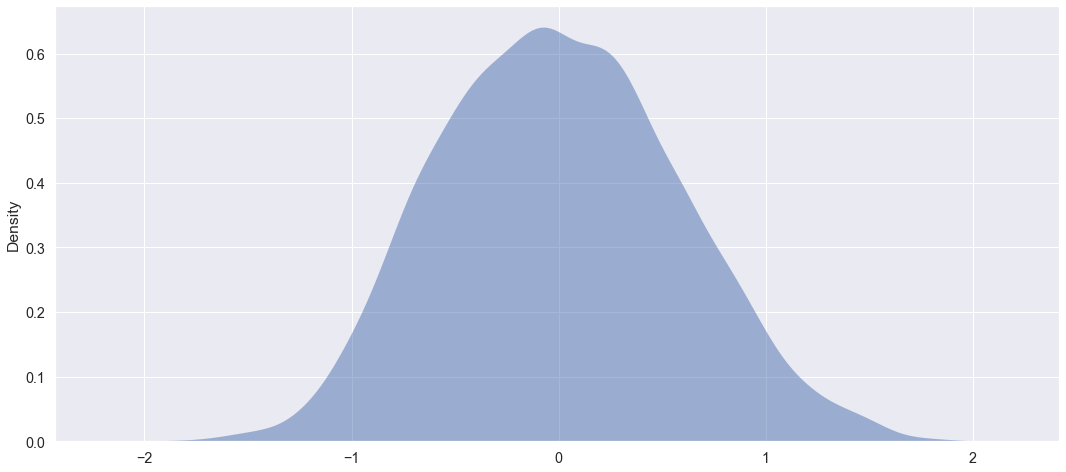

In [222]:
#Plotting residual to check for a normal distribution
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

### CONCLUSION
__________________
Subjects are **significantly** slower on the first three trials in each pointing position.

In [223]:
# Response time predicted by trial order in each starting location
formula = 'np.log(AbsolutError) ~ C(ID_for_StartingPosition, Treatment(reference=12))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                Mixed Linear Model Regression Results
Model:                        MixedLM             Dependent Variable:             np.log(AbsolutError)
No. Observations:             7708                Method:                         REML                
No. Groups:                   23                  Scale:                          1.7481              
Min. group size:              329                 Log-Likelihood:                 -13147.2128         
Max. group size:              336                 Converged:                      Yes                 
Mean group size:              335.1                                                                   
------------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------------------
Int

### Result
__________________
Subjects do not significantly differ in their precision across time spent at pointing position.


Text(0.5, 21.200000000000003, 'Residuals')

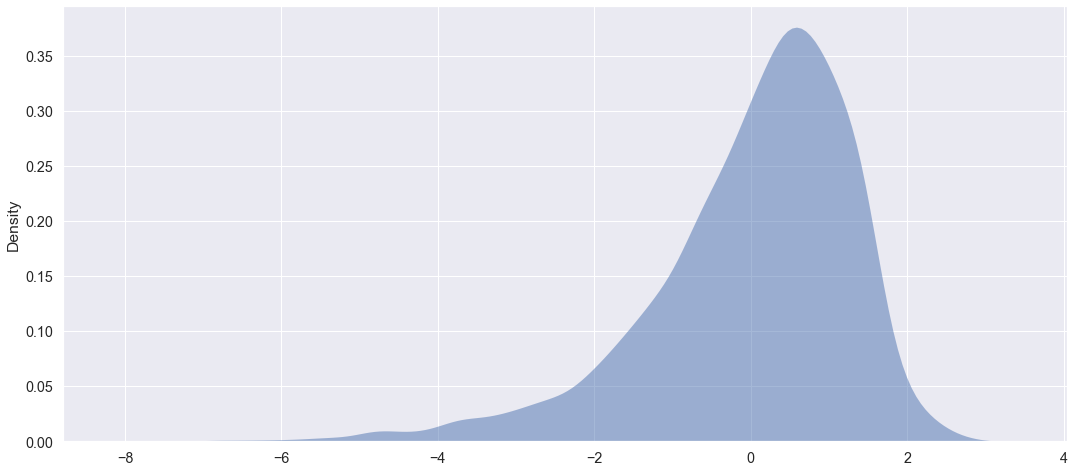

In [224]:
#Plotting residual to check for a normal distribution
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

In [225]:
# Response time predicted by trial order at the overall test
formula = 'np.log(RT) ~ C(TrialID, Treatment(reference=336))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                         Mixed Linear Model Regression Results
Model:                        MixedLM           Dependent Variable:           np.log(RT)
No. Observations:             7708              Method:                       REML      
No. Groups:                   23                Scale:                        0.2832    
Min. group size:              329               Log-Likelihood:               -6385.9546
Max. group size:              336               Converged:                    Yes       
Mean group size:              335.1                                                     
----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                      1.330    0.125 10.670 0.000  1.085  1.574
C(TrialID, Treatment(reference=336))[T.1.0]    

### Result
__________________
Subjects are in average 1.5 seconds slower during  the first 10 trials


In [226]:
# Response time predicted by trial order for the overall test
formula = 'np.log(AbsolutError) ~ C(TrialID, Treatment(reference=336))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                         Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        np.log(AbsolutError)
No. Observations:         7708           Method:                    REML                
No. Groups:               23             Scale:                     1.7483              
Min. group size:          329            Log-Likelihood:            -13084.8445         
Max. group size:          336            Converged:                 Yes                 
Mean group size:          335.1                                                         
----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept                                      3.251    0.289 11.238 0.000  2.684  3.818
C(TrialID, Treatment(reference=336))[T.1.0]    

### Result
__________________
Subjects accuracy does not increase throughout the task


### CONCLUSION
__________________
Subjects accuracy does not improve through the task, but their responsable does. This could be evidence of a learning effect of the testing format that does not enhance their performance. Their knwoledge is stable throughout.

## The two factor interaction: Meaningfulness*Presence

In [227]:
# Absolute predicted by Avatar Presence + Avatar Category
formula = "AbsolutError ~ C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory, Treatment(reference='NoAvatar')) + C(Context, Treatment(reference=False)):C(AvatarPresenceCategory, Treatment(reference='NoAvatar'))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                                             Mixed Linear Model Regression Results
Model:                                               MixedLM                                  Dependent Variable:                                  AbsolutError
No. Observations:                                    7708                                     Method:                                              REML        
No. Groups:                                          23                                       Scale:                                               1794.4180   
Min. group size:                                     329                                      Log-Likelihood:                                      -39846.1391 
Max. group size:                                     336                                      Converged:                                           Yes         
Mean group size:                                     335.1                                           

In [ ]:
#Plotting residual to check for a normal distribution
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

Text(0.5, 21.200000000000003, 'Residuals')

In [ ]:
# Response time predicted by Avatar Presence
formula = "np.log(RT) ~ C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory, Treatment(reference='NoAvatar')) + C(Context, Treatment(reference=False))*C(AvatarPresenceCategory, Treatment(reference='NoAvatar'))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
# Response time predicted Avatar Category + Location
formula = "AbsolutError ~ avatarID + C(Context, Treatment(reference=False)) + avatarID:C(Context, Treatment(reference=False))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
# Absolut error predicted by location
formula = "np.log(AbsolutError) ~ C(avatarID)"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

## FRS questionnaire analysis

In [ ]:
# Absolut error predicted by FRS
formula = "np.log(RT) ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
X = HumanAf[['Global', 'Overview', 'Cardinal']]
y = HumanAf['AbsolutError']

## fit a OLS model with intercept on FRS subscales
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

In [ ]:
#Plotting residual to check for a normal distribution
ax = sns.kdeplot(est.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals for log response times")
ax.set_xlabel("Residuals")

In [ ]:
# Absolut error predicted by FRS
formula = "np.log(AbsolutError) ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
#Plotting residual to check for a normal distribution
ax = sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals for  log transform of absolut error")
ax.set_xlabel("Residuals")

In [ ]:
# Response Time predicted by FRS
formula = "np.log(RT) ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

## Avatar questionnaire analysis

In [ ]:
# Response time predicted by Avatar Presence
formula = "AbsolutError ~ remember_action_likert + remember_standing_likert  + attractive_action_likert + attractive_standing_likert + realistic_action_likert + realistic_standing_likert"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
# Response time predicted by Avatar Presence
formula = "np.log(RT) ~ remember_action_likert + remember_standing_likert  + attractive_action_likert + attractive_standing_likert + realistic_action_likert + realistic_standing_likert"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
import random
number = random.randint(1000,9999)
print(number)

In [ ]:
# Response time predicted by Avatar Presence
formula = "np.log(AbsolutError) ~ ContextQ_average "

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
# Response time predicted by Avatar Presence
formula = "remember_action_likert ~ AffiliativeQ_average "

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

In [ ]:
HumanAaffili = HumanAf[['AffiliativeQ_average', 'remember_action_likert', 'remember_standing_likert', 'attractive_action_likert', 'attractive_standing_likert', 'realistic_action_likert', 'realistic_standing_likert','ContextQ_average' ]]
corrMatrix = HumanAaffili.corr()

fig, ax = plt.subplots(figsize=(8,6))
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", ax=ax, mask=mask)

ax.set_xticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average']);
ax.set_yticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average']);

In [ ]:
sns.regplot('remember_action_likert', 'AffiliativeQ_average', data= HumanAaffili )

In [ ]:
sns.regplot('realistic_standing_likert', 'AffiliativeQ_average', data= HumanAaffili )

In [ ]:
import scipy.stats
r, p = scipy.stats.pearsonr(HumanAf.AffiliativeQ_average, HumanAf.realistic_standing_likert)
p

In [ ]:
sns.set(rc={"figure.figsize":(18, 8)})
sns.set(font_scale = 1.3)
from matplotlib import cm

fig, ax = plt.subplots(1,2)

cor, pval = stats.spearmanr(corrMatrix.T)
sns.heatmap(cor, annot=True, cmap="YlGnBu", mask=mask, ax=ax[0]).set(title="Spearman's rank correlation coefficients(ρ)")
initial_cmap = cm.get_cmap('YlGnBu')
reversed_cmap=initial_cmap.reversed()
sns.heatmap(pval, annot=True, cmap=reversed_cmap, mask=mask, ax=ax[1]).set(title="Probability values for Spearman's rank correlation")

for ax in ax.ravel():
    ax.set_xticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average'], rotation=60);
    ax.set_yticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average'], rotation=360);
plt.tight_layout()
plt.show()

In [ ]:
HumanAf.info()

In [ ]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns

# with regression
sns.pairplot(HumanAaffili, kind="reg")
plt.show()